In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

print("✅ All libraries loaded successfully!")



✅ All libraries loaded successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

print("✅ All libraries loaded successfully!")

✅ All libraries loaded successfully!


In [30]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")  
print("Shape (rows, columns):", df.shape)

df.head()


Shape (rows, columns): (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Title          891 non-null    object 
 13  FamilySize     891 non-null    int64  
 14  FarePerPerson  891 non-null    float64
 15  CabinDeck      891 non-null    object 
 16  CabinMissing   891 non-null    int32  
dtypes: float64(3), int32(1), int64(6), object(7)
memory us

In [31]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [9]:
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]


Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

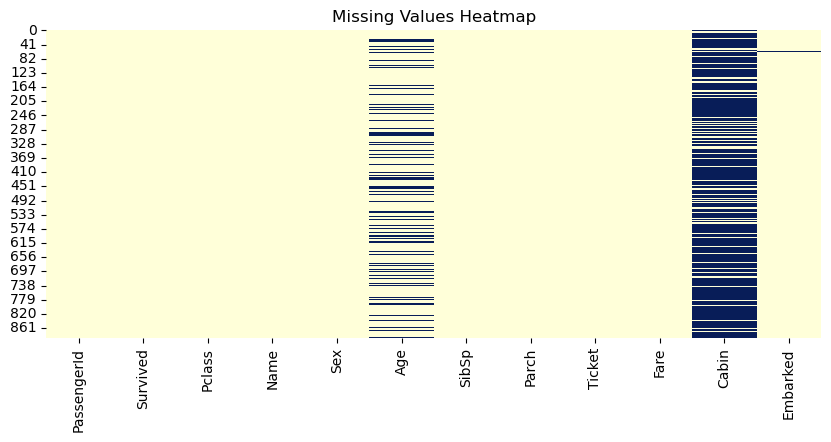

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Missing Values Heatmap")
plt.show()


In [11]:
import re

def extract_title(name):
    m = re.search(r',\s*([^\.]+)\.', str(name))
    return m.group(1).strip() if m else "Unknown"

df['Title'] = df['Name'].apply(extract_title)

rare_map = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Royal', 'Countess': 'Royal', 'Don': 'Royal',
    'Sir': 'Royal', 'Dona': 'Royal', 'Jonkheer': 'Royal'
}
df['Title'] = df['Title'].replace(rare_map)

df['Title'].value_counts()


Title
Mr              517
Miss            185
Mrs             126
Master           40
Dr                7
Rev               6
Royal             4
Major             2
Col               2
Capt              1
the Countess      1
Name: count, dtype: int64

In [12]:
if set(['SibSp','Parch','Fare']).issubset(df.columns):
    df['FamilySize'] = 1 + df['SibSp'].fillna(0) + df['Parch'].fillna(0)
    df['FarePerPerson'] = df['Fare'].fillna(df['Fare'].median()) / df['FamilySize'].replace(0,1)

df[['FamilySize','FarePerPerson']].head()


,FamilySize,FarePerPerson
0,2,3.62500
1,2,35.64165
2,1,7.92500
3,2,26.55000
4,1,8.05000


In [13]:
if 'Cabin' in df.columns:
    df['CabinDeck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'Missing')
    df['CabinMissing'] = df['Cabin'].isna().astype(int)

df[['CabinDeck','CabinMissing']].head()


,CabinDeck,CabinMissing
0,Missing,1
1,C,0
2,Missing,1
3,C,0
4,Missing,1


In [14]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FarePerPerson,CabinDeck,CabinMissing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,3.62500,Missing,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,35.64165,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,7.92500,Missing,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,26.55000,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,8.05000,Missing,1


In [15]:
from sklearn.impute import SimpleImputer

df_simple = df.copy()

num_cols = df_simple.select_dtypes(include=[float,int]).columns
num_imputer = SimpleImputer(strategy='median')
df_simple[num_cols] = num_imputer.fit_transform(df_simple[num_cols])

cat_cols = df_simple.select_dtypes(include=['object','category']).columns
for c in cat_cols:
    if df_simple[c].isnull().sum() > 0:
        df_simple[c].fillna(df_simple[c].mode().iloc[0], inplace=True)

print("✅ Simple imputation done!")
df_simple.isnull().sum().sort_values(ascending=False).head()


✅ Simple imputation done!


C:\Users\nayan\AppData\Local\Temp\ipykernel_3136\3742584735.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_simple[c].fillna(df_simple[c].mode().iloc[0], inplace=True)


PassengerId      0
Fare             0
CabinDeck        0
FarePerPerson    0
FamilySize       0
dtype: int64

In [16]:
from sklearn.impute import KNNImputer

df_knn = df.copy()
num_cols = df_knn.select_dtypes(include=[float,int]).columns
knn = KNNImputer(n_neighbors=5)
df_knn[num_cols] = knn.fit_transform(df_knn[num_cols])

cat_cols = df_knn.select_dtypes(include=['object','category']).columns
for c in cat_cols:
    if df_knn[c].isnull().sum() > 0:
        df_knn[c].fillna(df_knn[c].mode().iloc[0], inplace=True)

print("✅ KNN imputation done!")
df_knn.isnull().sum().sum()


✅ KNN imputation done!


C:\Users\nayan\AppData\Local\Temp\ipykernel_3136\3601787704.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_knn[c].fillna(df_knn[c].mode().iloc[0], inplace=True)


0

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

df_age = df.copy()

features = [c for c in ['Pclass','Sex','Title','FamilySize','FarePerPerson','CabinMissing'] if c in df_age.columns]

X = pd.get_dummies(df_age[features].fillna('Missing'), drop_first=True)
y = df_age['Age']
mask = y.notna()

X_train, X_val, y_train, y_val = train_test_split(X[mask], y[mask], test_size=0.2, random_state=42)
age_model = KNeighborsRegressor(n_neighbors=7)
age_model.fit(X_train, y_train)
pred = age_model.predict(X_val)
print("Age MAE on validation:", mean_absolute_error(y_val, pred))

X_all = pd.get_dummies(df_age[features].fillna('Missing'), drop_first=True)
for col in X_train.columns:
    if col not in X_all.columns:
        X_all[col] = 0
X_all = X_all[X_train.columns]
missing_mask = df_age['Age'].isna()
df_age.loc[missing_mask, 'Age'] = age_model.predict(X_all.loc[missing_mask])

print("✅ Target-aware Age imputation complete! Remaining NaNs:", df_age['Age'].isna().sum())


Age MAE on validation: 9.00849150849151
✅ Target-aware Age imputation complete! Remaining NaNs: 0


In [19]:
df_simple.to_csv("data_simple_imputed.csv", index=False)
df_knn.to_csv("data_knn_imputed.csv", index=False)
df_age.to_csv("data_targetage_imputed.csv", index=False)
print("✅ All three imputed datasets saved ")


✅ All three imputed datasets saved 


In [32]:
import pandas as pd

df_outlier = df_age.copy()
numeric_cols = df_outlier.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    Q1 = df_outlier[col].quantile(0.25)
    Q3 = df_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_outlier[f'{col}_outlier'] = ((df_outlier[col] < lower) | (df_outlier[col] > upper)).astype(int)

df_outlier['total_outlier_flags'] = df_outlier[[c for c in df_outlier.columns if '_outlier' in c]].sum(axis=1)

print("✅ IQR outlier flagging done.")
df_outlier['total_outlier_flags'].value_counts().head()


✅ IQR outlier flagging done.


total_outlier_flags
0    576
1    152
2     97
3     53
4     13
Name: count, dtype: int64

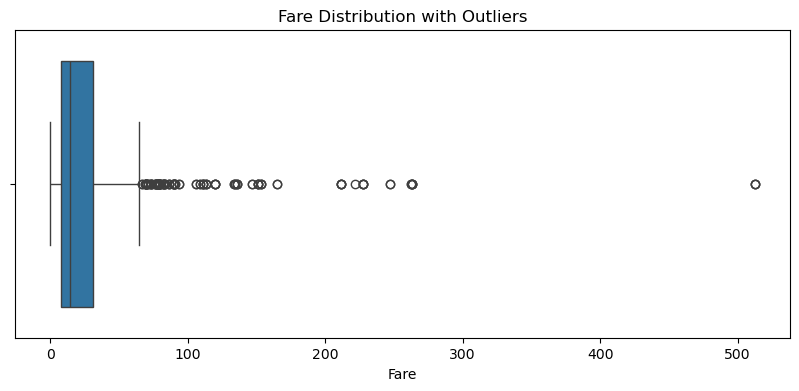

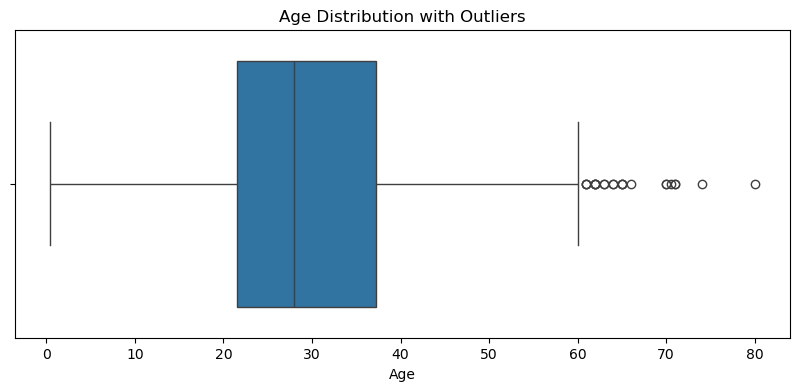

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.boxplot(x=df_outlier['Fare'])
plt.title("Fare Distribution with Outliers")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df_outlier['Age'])
plt.title("Age Distribution with Outliers")
plt.show()


In [22]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.03, random_state=42)
X_num = df_outlier[numeric_cols].fillna(df_outlier[numeric_cols].median())
outlier_pred = iso.fit_predict(X_num)

df_outlier['iso_outlier'] = (outlier_pred == -1).astype(int)
print("✅ Isolation Forest outlier detection complete.")
df_outlier['iso_outlier'].value_counts()

✅ Isolation Forest outlier detection complete.


iso_outlier
0    864
1     27
Name: count, dtype: int64

In [23]:
df_no_outlier = df_outlier[df_outlier['iso_outlier'] == 0].copy()
print("Before:", df_outlier.shape)
print("After removing outliers:", df_no_outlier.shape)


Before: (891, 28)
After removing outliers: (864, 28)


In [25]:
df_outlier.to_csv("data_with_outlier_flags.csv", index=False)
df_no_outlier.to_csv("data_after_removal.csv", index=False)
print("✅ Outlier datasets saved successfully!")


✅ Outlier datasets saved successfully!


In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_scaled = df_no_outlier.copy()

num_cols = df_scaled.select_dtypes(include=['float64','int64']).columns

minmax = MinMaxScaler()
df_minmax = df_scaled.copy()
df_minmax[num_cols] = minmax.fit_transform(df_scaled[num_cols])

standard = StandardScaler()
df_standard = df_scaled.copy()
df_standard[num_cols] = standard.fit_transform(df_scaled[num_cols])

df_minmax.to_csv("data_final_minmax.csv", index=False)
df_standard.to_csv("data_final_standardized.csv", index=False)

print("✅ Normalization & Standardization completed successfully!")
print("Files saved")


✅ Normalization & Standardization completed successfully!
Files saved


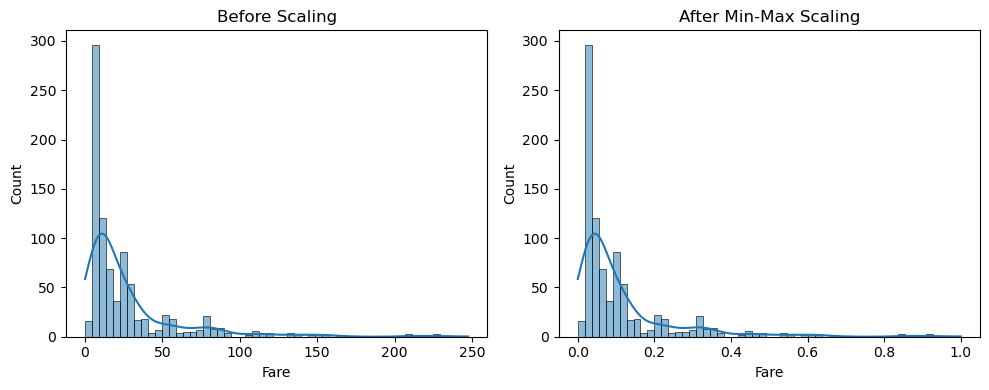

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Before Scaling")
sns.histplot(df_scaled['Fare'], kde=True)

plt.subplot(1,2,2)
plt.title("After Min-Max Scaling")
sns.histplot(df_minmax['Fare'], kde=True)
plt.tight_layout()
plt.show()
